**#2, Section 1.1.1** Rewriting of Program 1.1: Modify it to plot the discrete derivative of sin(t) on the interval [0, 2pi]. Use 10, 100, and 1000 equally spaced times. Plot the 3 results on the same graph using different colors. Use the legend() command to indicate the different curves.

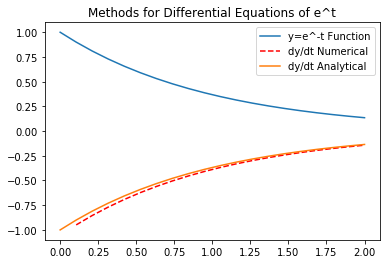

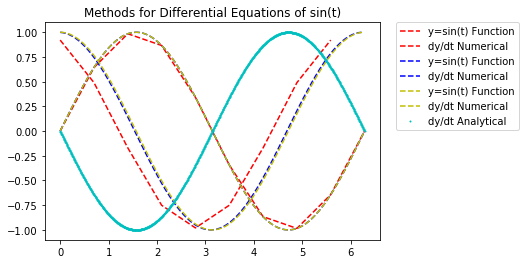

In [6]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline

################Begin evaluation of e^(t):
t = np.linspace(0,2,20) #define a time array
y = np.exp(-t) #evaluate the function y = eˆ(-t)
P.plot(t,y) #plot the function

dydt = np.diff(y)/np.diff(t) #take the discrete derivative
P.plot(t[1:],dydt,'r--') #plot the numerical derivative
P.plot(t,-y) #plot the analytical derivative
P.legend(['y=e^-t Function','dy/dt Numerical','dy/dt Analytical'])
P.title('Methods for Differential Equations of e^t')
P.show()
################End evaluation of e^(t).

################Begin evaluation of sin(t):
colorList = ['r--','b--','y--']
for j,k in enumerate([10, 100, 1000]):
    
    t = np.linspace(0,2*np.pi,k) #define a time array
    y = np.sin(t) #evaluate the function y = sin(t)
    dydt = np.diff(y)/np.diff(t) #take the discrete derivative
        
    P.plot(t,y,colorList[j],label='y=sin(t) Function') #plot the function
    P.plot(t[:-1],dydt,colorList[j],label='dy/dt Numerical') #plot the numerical derivative
    
    
P.plot(t,-y,'co',markersize=1,label='dy/dt Analytical') #plot the analytical derivative
P.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
P.title('Methods for Differential Equations of sin(t)')
P.show()
################End evaluation of sin(t).

**#3, Section 1.1.2** Rewriting Program 1.2 to plot the Euler's method approximation to the solution to: dy/dt=sqrt(y) with parameters y[0]=5 (initial condition), time step = 0.1, and time interval [0,4]. Also plot the analytical solution and use the legend() command to label the points.

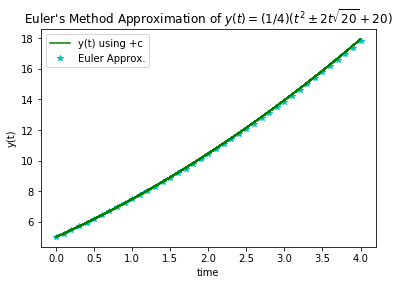

In [11]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
   
###################Begin Euler's Approximation Method of dy/dt=sqrt(y):
y = 5 #initial condition
dt = 0.1 #set the time step interval
time = 0 #set the start time=0
Tfinal = 4 #end time of the simulation
Nsteps = round(Tfinal/dt) #number of time steps to take, integer
P.plot(time,y,'c*') #plot initial conditions

for i in range (1,Nsteps+1): #number of time steps to take
    y = y + dt*np.sqrt(y) #Equation 1.9 revised to current dy/dt=sqrt(y)
    time = time + dt #Increment time
    EulerLine, = P.plot(time,y,'c*', label='Line 1')  #plot current point for Euler
    
    t = np.linspace(0,Tfinal,100) #set up increments for analytical solution
    functionPlus = (1/4)*(2*np.sqrt(20)*t + 20 + t**2)  #function y(t) with c=+sqrt(20)
    FunctionLine1, = P.plot(t,functionPlus,'g', label='Line 2')  #plot analytical solution1
      
    P.legend([FunctionLine1, EulerLine], ['y(t) using +c','Euler Approx.']) #add legend to label plots accordingly 
    P.xlabel('time') #add plot labels
    P.ylabel('y(t)')
    P.title("Euler's Method Approximation of $y(t)=(1/4)(t^{2} \pm 2t \sqrt{20} + 20)$") #add plot title
P.show()
###################End Euler's Approximation Method of dy/dt=sqrt(y).

**#4, Section 1.1.3** Duplicate Figure 1.4 using $y = 7e^{6t}$ and its Taylor series approximations for 2,3,4,5 terms using time interval from t=0 to t=0.3. Label functions using the TEXT command from MATPLOTLIB.

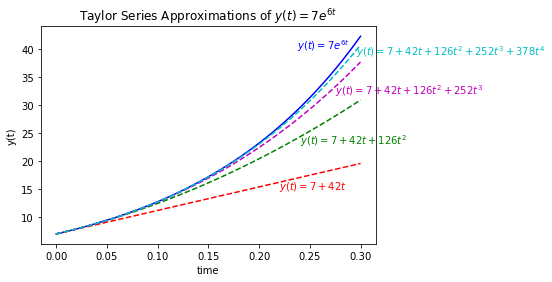

In [3]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline

t = np.linspace(0,0.3,100) #set up increments for solutions

y = 7*np.exp(6*t)      #function
y2 = 7 + 42*t          #2-term Taylor series approx
y3 = y2 + 126*(t**2)   #3-term Taylor series approx
y4 = y3 + 252*(t**3)   #4-term Taylor series approx
y5 = y4 + 378*(t**4)   #5-term Taylor series approx

P.plot(t,y,'b') #plot function
P.text(0.237,40,'$y(t)=7e^{6t}$',color='b')
P.plot(t,y2,'r--') #plot 2 terms
P.text(0.22,15,'$y(t)=7+42t$',color='r')
P.plot(t,y3,'g--') #plot 3 terms
P.text(0.24,23,'$y(t)=7+42t+126t^{2}$',color='g')
P.plot(t,y4,'m--') #plot 4 terms
P.text(0.275,32,'$y(t)=7+42t+126t^{2}+252t^{3}$',color='m')
P.plot(t,y5,'c--') #plot 5 terms
P.text(0.296,39,'$y(t)=7+42t+126t^{2}+252t^{3}+378t^{4}$',color='c')
P.xlabel('time') #add plot labels
P.ylabel('y(t)')
P.title("Taylor Series Approximations of $y(t)=7e^{6t}$") #add plot title
P.show()


**#5, Section 1.1.3** Modify Program 1.3 to plot the error scaling in Euler method for dy/dt=sin(y) using y[0]=1 and time interval [0,2$\pi$]. Label curves using TEXT command.

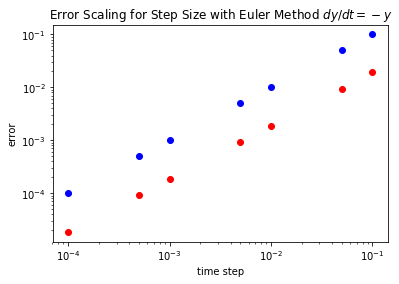

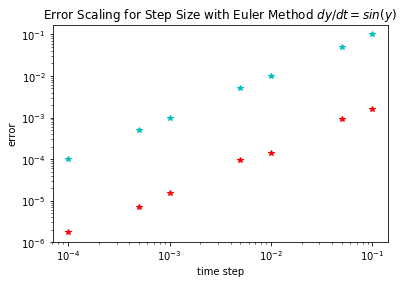

In [2]:
import numpy as np
import sympy as S
import matplotlib.pyplot as P
%matplotlib inline

###########Begin original Program 1.3:
dt = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
k = len(dt)
X = np.zeros((k,2))

for j in range(k):
    y = 1        #initial condition
    time = 0     #set the time=0
    Tfinal = 1   #final time
    Nsteps = round(Tfinal/dt[j]) #number of steps to take
    
    for i in range(Nsteps):
        y = y - dt[j]*y         #extrapolate one time step
        time = time + dt[j]     #increment time
    
    X[j,1] = abs(np.exp(-Tfinal) - y)  #compute the error and store
    X[j,0] = dt[j]              #store the time step
P.loglog(X[:,0],X[:,1],'ro')   #display on log-log plot
P.loglog(X[:,0],X[:,0],'bo')
P.xlabel('time step')
P.ylabel('error')
P.title("Error Scaling for Step Size with Euler Method $ dy/dt = -y $")
P.show()
###########End original Program 1.3.

###########Begin New Program:
dt = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1]
k = len(dt)
X = np.zeros((k,2))

for j in range(k):
    y = 1        #initial condition
    time = 0     #set the time=0
    Tfinal = 2*np.pi   #final time
    Nsteps = round(Tfinal/dt[j]) #number of steps to take
    
    for i in range(Nsteps):
        y = y + dt[j]*np.sin(y) #extrapolate one time step
        time = time + dt[j]     #increment time
    
    X[j,1] = abs((2*S.acot(S.cot(.5)/np.exp(Tfinal))) - y)  #compute the error and store
    X[j,0] = dt[j]              #store the time step
P.loglog(X[:,0],X[:,1],'r*')   #display on log-log plot
P.loglog(X[:,0],X[:,0],'c*')
P.xlabel('time step')
P.ylabel('error')
P.title("Error Scaling for Step Size with Euler Method $ dy/dt = sin(y) $")
P.show()
###########End New Program.

**#6** Write out a script (not a function) that initializes then loops and creates an output per instructions.

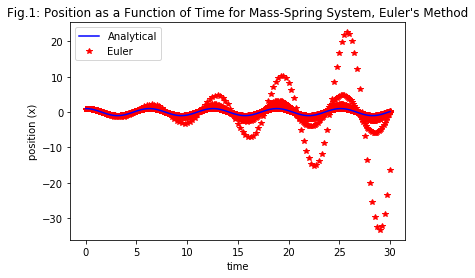

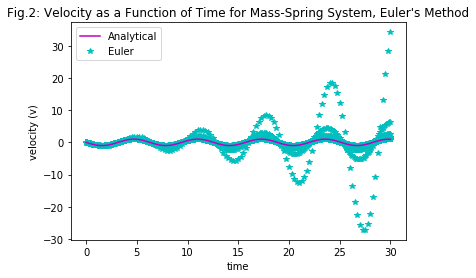

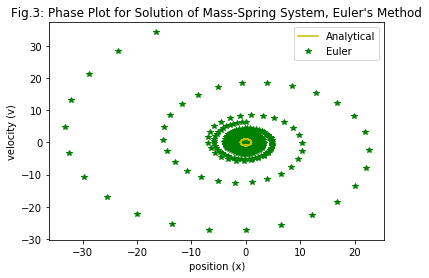

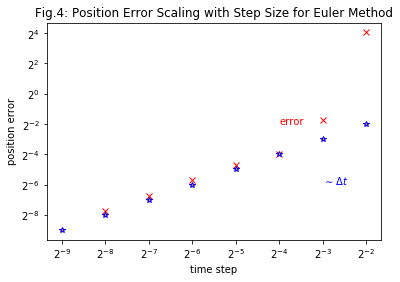

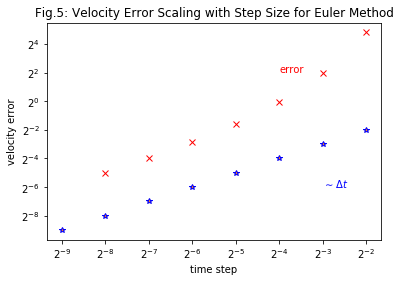

In [14]:
import numpy as np
import matplotlib.pyplot as P
%matplotlib inline
 
n_soln = 8
dt0 = 0.25               #initial time step
x0 = 1                   #initial position
v0 = 0                   #initial velocity
t_final = 30              #final time to integrate to
x_f = np.zeros(n_soln)
v_f = np.zeros(n_soln)
dt_vec = np.zeros(n_soln)
dy = np.zeros(2)  #empty vector to fill for my dy values
t_all = [0]
x_all = [1]
v_all = [0]

for jj in range (0,n_soln):
    y = [x0, v0]      #initial conditions [position, velocity] as a vector
    time = 0          #time begin
    dt = dt0 / 2**jj  #time step
    dt_vec[jj] = dt
    Nsteps = round(t_final/dt) #number of time steps to take, integer
    
    for i in range (Nsteps): #number of time steps to take
        dy[0] = y[1]      #eqn for dx/dt
        dy[1] = -y[0]     #eqn for dv/dt
        y = y + dt*dy #iterative formula
        time = time + dt #Increment time
        t_all.append(time) #store 'time' in a vector
        x_all.append(y[0]) #store 'position' in a vector
        v_all.append(y[1]) #store 'velocity' in a vector
        
    x_f[jj] = y[0]  
    v_f[jj] = y[1]

P.figure(1)
EulerLine1, = P.plot(t_all,x_all,'r*', label='Line 1')  #plot current point for Euler
P.figure(2)
EulerLine2, = P.plot(t_all,v_all,'c*', label='Line 2')  #plot current point for Euler
P.figure(3)
EulerLine3, = P.plot(x_all,v_all,'g*', label='Line 3')  #plot current point for Euler

          
t = np.linspace(0,t_final,100) #set up increments for analytical solution
function = np.cos(t) 
functionDeriv = -np.sin(t)
P.figure(1)
FunctionLine1, = P.plot(t,function,'b', label='Line 4')  #plot analytical solution for function
P.figure(2)
FunctionLine2, = P.plot(t,functionDeriv,'m', label='Line 5')  #plot analytical solution for derivative of func
P.figure(3)
FunctionLine3, = P.plot(function,functionDeriv,'y', label='Line 6')  #plot analytical solution for derivative of func

P.figure(1)
P.legend([FunctionLine1, EulerLine1], ['Analytical','Euler']) #add legend to label plots accordingly 
P.xlabel('time') #add plot labels
P.ylabel('position (x)')
P.title("Fig.1: Position as a Function of Time for Mass-Spring System, Euler's Method") #add plot title

P.figure(2)
P.legend([FunctionLine2, EulerLine2], ['Analytical','Euler']) #add legend to label plots accordingly 
P.xlabel('time') #add plot labels
P.ylabel('velocity (v)')
P.title("Fig.2: Velocity as a Function of Time for Mass-Spring System, Euler's Method") #add plot title

P.figure(3)
P.legend([FunctionLine3, EulerLine3], ['Analytical','Euler']) #add legend to label plots accordingly 
P.xlabel('position (x)') #add plot labels
P.ylabel('velocity (v)')
P.title("Fig.3: Phase Plot for Solution of Mass-Spring System, Euler's Method") #add plot title

P.figure(4)
y4 = abs(np.diff(x_f))
x4 = dt_vec[0:-1]
P.ylabel('position error')
P.xlabel('time step')
P.title("Fig.4: Position Error Scaling with Step Size for Euler Method")
P.loglog(x4, y4, basex=2, basey=2, linestyle='None', marker='x', markeredgecolor='red')
P.text(2**-4,2**-2,'error',color='r')
P.loglog(dt_vec,dt_vec,basex=2, basey=2, linestyle='None', marker='*', markeredgecolor='blue')
P.text(2**-3,2**-6,'$\sim\Delta  t$',color='b')

P.figure(5)
y5 = abs(np.diff(v_f))
x5 = dt_vec[0:-1]
P.ylabel('velocity error')
P.xlabel('time step')
P.title("Fig.5: Velocity Error Scaling with Step Size for Euler Method")
P.loglog(x5, y5, basex=2, basey=2, linestyle='None', marker='x', markeredgecolor='red')
P.text(2**-4,2**2,'error',color='r')
P.loglog(dt_vec,dt_vec,basex=2, basey=2, linestyle='None', marker='*', markeredgecolor='blue')
P.text(2**-3,2**-6,'$\sim\Delta  t$',color='b')

P.show()  